# Solar Challenge Week 1 - EDA and Data Cleaning
This notebook demonstrates:
- Loading the dataset
- Basic profiling and statistics
- Cleaning missing or invalid values
- Exporting cleaned dataset

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525

c:\Users\sciec\solar-challenge-week1\notebooks\../src/analysis\solar_features.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
c:\Users\sciec\solar-challenge-week1\notebooks\../src/analysis\solar_features.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
c:\Users\sciec\solar-challenge-week1\notebooks\../src/analysis\solar_features.py:31: SettingWithCopyWarning: 
A value is trying to be set on a c

Daily features saved to '../data/benin_daily_features.csv'


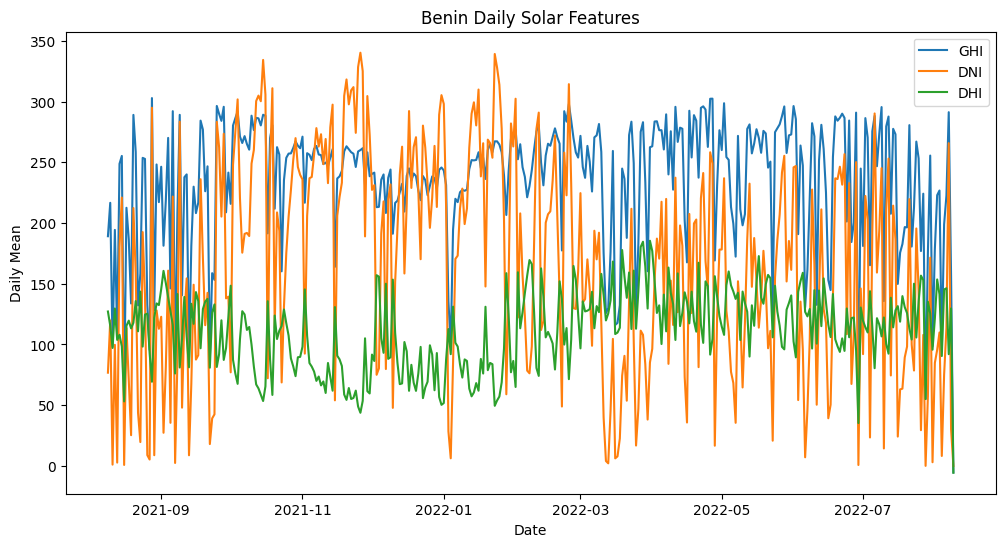

Correlation matrix:
                 GHI_daily_mean  DNI_daily_mean  DHI_daily_mean
GHI_daily_mean        1.000000        0.779153       -0.030933
DNI_daily_mean        0.779153        1.000000       -0.633240
DHI_daily_mean       -0.030933       -0.633240        1.000000


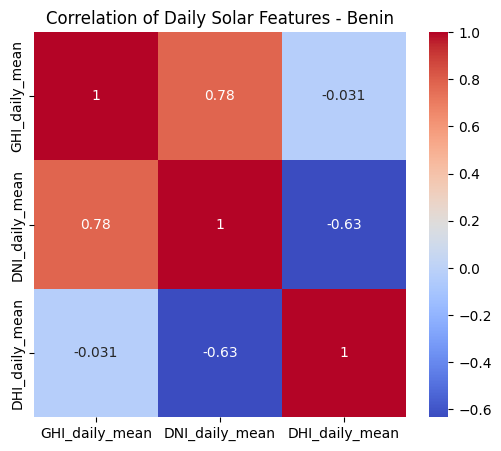

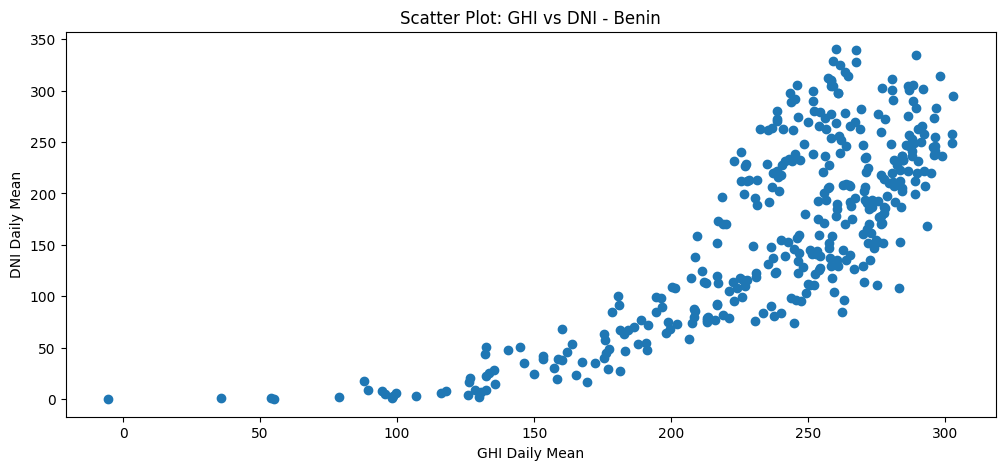

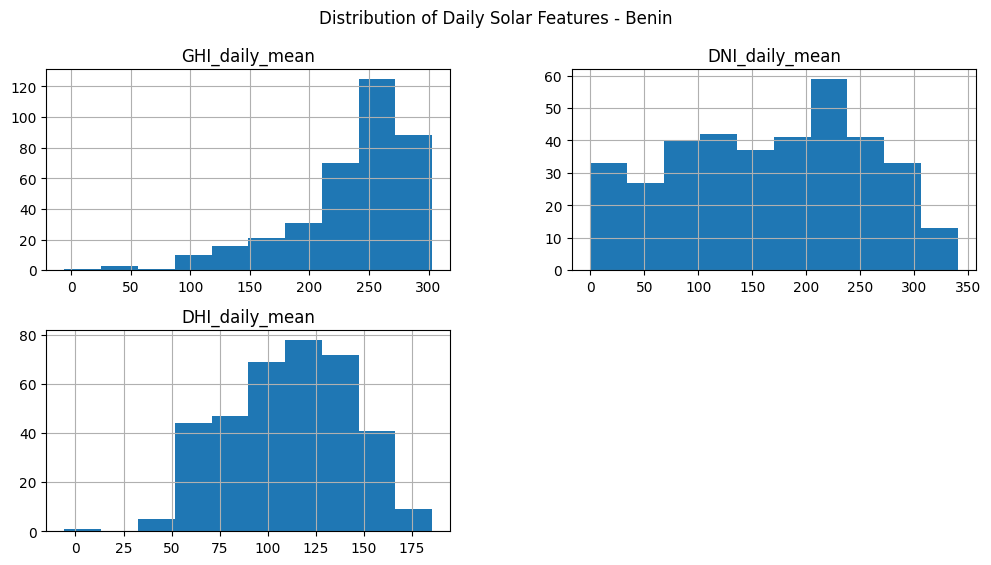

In [ ]:
# Benin EDA Notebook

# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy import stats

# Add module path for solar_features.py
sys.path.append('../src/analysis')

# Import modular functions
from solar_features import compute_daily_mean, compute_daily_max, merge_daily_features

# Load the Benin dataset
df = pd.read_csv('../data/benin-malanville.csv')
df.head()

# --- Data profiling ---
print("Data Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing values per column:")
print(df.isna().sum())

# --- Outlier detection using Z-scores ---
z_thresh = 3  # 3 standard deviations
numeric_cols = ['GHI', 'DNI', 'DHI']  # columns to check

z_scores = stats.zscore(df[numeric_cols])
abs_z_scores = abs(z_scores)
filter_mask = (abs_z_scores < z_thresh).all(axis=1)
df_clean = df[filter_mask]

print(f"\nOriginal rows: {len(df)}, After removing outliers: {len(df_clean)}")

# --- Compute daily features ---
df_ghi_daily = compute_daily_mean(df_clean, 'GHI')
df_dni_daily = compute_daily_mean(df_clean, 'DNI')
df_dhi_daily = compute_daily_mean(df_clean, 'DHI')

# Merge into a single daily dataframe
df_daily = merge_daily_features(df_ghi_daily, df_dni_daily, df_dhi_daily)

# Save daily features
df_daily.to_csv('../data/benin_daily_features.csv', index=False)
print("Daily features saved to '../data/benin_daily_features.csv'")

# --- Time series plot ---
plt.figure(figsize=(12,6))
plt.plot(df_daily['Date'], df_daily['GHI_daily_mean'], label='GHI')
plt.plot(df_daily['Date'], df_daily['DNI_daily_mean'], label='DNI')
plt.plot(df_daily['Date'], df_daily['DHI_daily_mean'], label='DHI')
plt.xlabel('Date')
plt.ylabel('Daily Mean')
plt.title('Benin Daily Solar Features')
plt.legend()
plt.show()

# --- Correlation heatmap ---
corr = df_daily[['GHI_daily_mean','DNI_daily_mean','DHI_daily_mean']].corr()
print("Correlation matrix:\n", corr)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation of Daily Solar Features - Benin")
plt.show()

# --- Scatter plots ---
plt.figure(figsize=(12,5))
plt.scatter(df_daily['GHI_daily_mean'], df_daily['DNI_daily_mean'])
plt.xlabel('GHI Daily Mean')
plt.ylabel('DNI Daily Mean')
plt.title('Scatter Plot: GHI vs DNI - Benin')
plt.show()

# --- Histograms ---
df_daily[['GHI_daily_mean', 'DNI_daily_mean', 'DHI_daily_mean']].hist(figsize=(12,6))
plt.suptitle("Distribution of Daily Solar Features - Benin")
plt.show()
